In [549]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [550]:
os.getcwd()
os.chdir('c:\\Users\\CHARLES\\Documents\\Python Programming\\Datasets')

# Data Exploration and Preproccessing

In [551]:
df = pd.read_csv('eq2015.csv')
pd.set_option('display.max_columns', None)

In [552]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   building_id                  762106 non-null  int64 
 1   district_id                  762106 non-null  int64 
 2   vdcmun_id                    762106 non-null  int64 
 3   ward_id                      762106 non-null  int64 
 4   count_floors_pre_eq          762106 non-null  int64 
 5   count_floors_post_eq         762106 non-null  int64 
 6   age_building                 762106 non-null  int64 
 7   plinth_area_sq_ft            762106 non-null  int64 
 8   height_ft_pre_eq             762106 non-null  int64 
 9   height_ft_post_eq            762106 non-null  int64 
 10  land_surface_condition       762106 non-null  object
 11  foundation_type              762106 non-null  object
 12  roof_type                    762106 non-null  object
 13  ground_floor_t

In [554]:
df.isnull().sum()

building_id                     0
district_id                     0
vdcmun_id                       0
ward_id                         0
count_floors_pre_eq             0
count_floors_post_eq            0
age_building                    0
plinth_area_sq_ft               0
height_ft_pre_eq                0
height_ft_post_eq               0
land_surface_condition          0
foundation_type                 0
roof_type                       0
ground_floor_type               0
other_floor_type                0
position                        1
plan_configuration              1
condition_post_eq               0
damage_grade                   12
technical_solution_proposed    12
superstructure                  0
dtype: int64

In [555]:
df[df['damage_grade'].isnull()]
df.dropna(subset=['damage_grade','technical_solution_proposed'], inplace=True)
df.isnull().sum()

building_id                    0
district_id                    0
vdcmun_id                      0
ward_id                        0
count_floors_pre_eq            0
count_floors_post_eq           0
age_building                   0
plinth_area_sq_ft              0
height_ft_pre_eq               0
height_ft_post_eq              0
land_surface_condition         0
foundation_type                0
roof_type                      0
ground_floor_type              0
other_floor_type               0
position                       0
plan_configuration             0
condition_post_eq              0
damage_grade                   0
technical_solution_proposed    0
superstructure                 0
dtype: int64

In [556]:
df.duplicated().sum()

0

In [557]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
count,7.620940e+05,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000
mean,2.607522e+11,25.767912,2582.695976,258275.039247,2.087787,1.252050,24.325031,406.673668,16.049424,9.868785
std,5.801868e+10,5.807569,581.174161,58117.487798,0.655104,1.063278,65.034555,226.780437,5.493900,8.574218
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000


## Categorical Data

In [558]:
cat_list = df.select_dtypes(include='object').columns.tolist()

In [559]:
def check_unique_values(df,col):
    unique_values = df[col].unique()
    print(f"\nUnique values in '{col}': {unique_values}")
    return unique_values

In [560]:
for cat in cat_list:
    check_unique_values(df, cat)


Unique values in 'land_surface_condition': ['Flat' 'Moderate slope' 'Steep slope']

Unique values in 'foundation_type': ['Other' 'Mud mortar-Stone/Brick' 'Cement-Stone/Brick' 'Bamboo/Timber'
 'RC']

Unique values in 'roof_type': ['Bamboo/Timber-Light roof' 'Bamboo/Timber-Heavy roof' 'RCC/RB/RBC']

Unique values in 'ground_floor_type': ['Mud' 'Brick/Stone' 'RC' 'Timber' 'Other']

Unique values in 'other_floor_type': ['Not applicable' 'TImber/Bamboo-Mud' 'Timber-Planck' 'RCC/RB/RBC']

Unique values in 'position': ['Not attached' 'Attached-1 side' 'Attached-2 side' 'Attached-3 side']

Unique values in 'plan_configuration': ['Rectangular' 'L-shape' 'Square' 'T-shape' 'Multi-projected' 'H-shape'
 'U-shape' 'Others' 'E-shape' 'Building with Central Courtyard']

Unique values in 'condition_post_eq': ['Damaged-Used in risk' 'Damaged-Repaired and used'
 'Damaged-Rubble unclear' 'Not damaged' 'Damaged-Not used'
 'Damaged-Rubble clear' 'Damaged-Rubble Clear-New building built'
 'Covered by lands

Remove all foundation_type with other

In [561]:
df = df[~df['foundation_type'].isin(['Other'])]

In [562]:
df = df[~df['other_floor_type'].isin(['Not applicable'])]

In [563]:
df = df[~df['ground_floor_type'].isin(['Other'])]

## Exploring Target Variable

In [564]:
df['damage_grade'].value_counts()

damage_grade
Grade 5    241074
Grade 4    167595
Grade 3    117919
Grade 2     65847
Grade 1     47549
Name: count, dtype: int64

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\1737994719.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='damage_grade', data=df, palette='Set2')


Text(0.5, 1.0, 'Damage Grade Distribution')

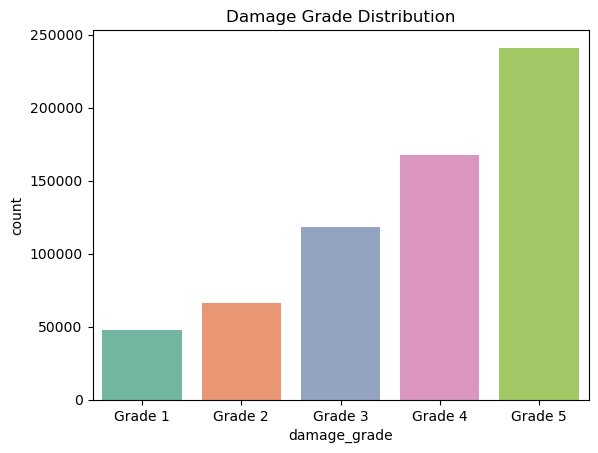

In [565]:
sns.countplot(x='damage_grade', data=df, palette='Set2')
plt.title('Damage Grade Distribution')

All the classes are less than 70%, hence the classes are balanced. No need for addressing class imbalance

## Feature Distributions

In [566]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('building_id')
numeric_cols.remove('district_id')
numeric_cols.remove('vdcmun_id')
numeric_cols.remove('ward_id')
numeric_cols

['count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq']

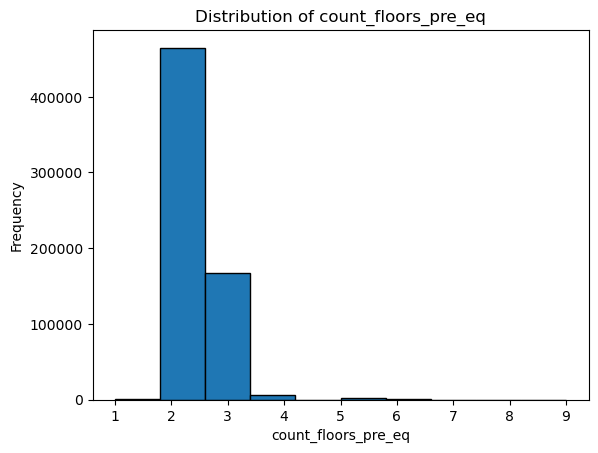

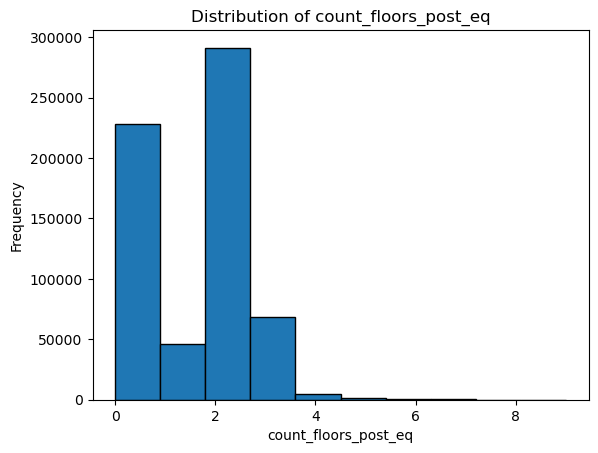

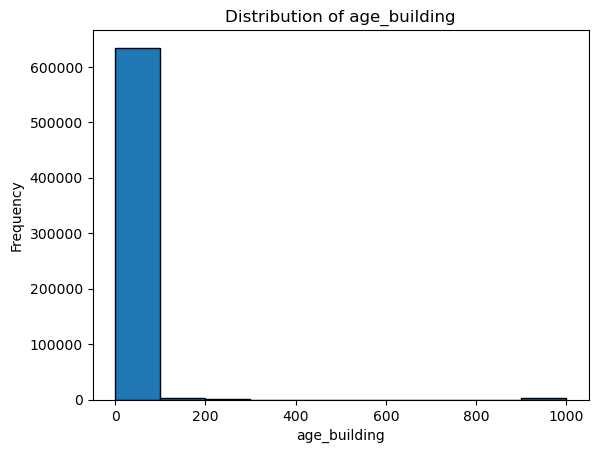

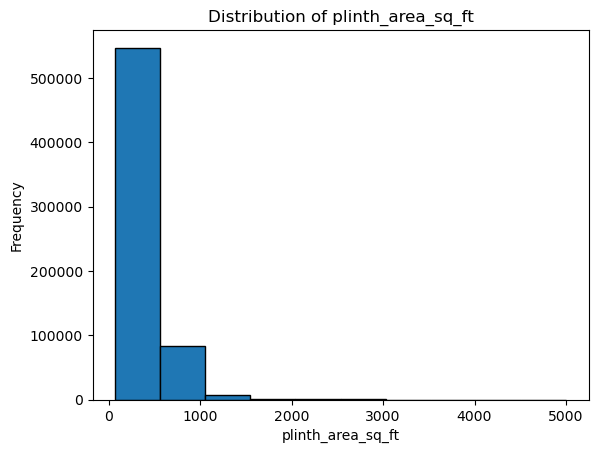

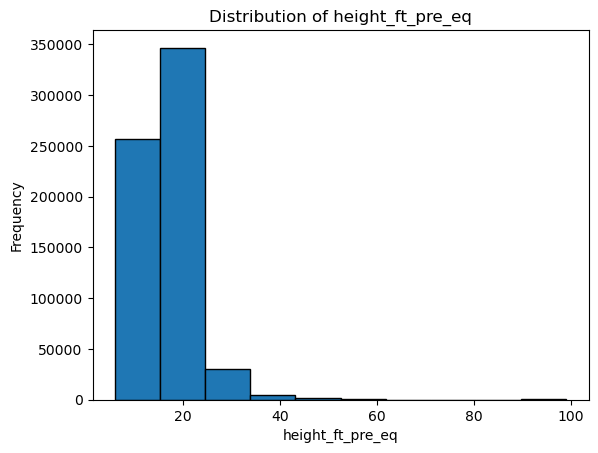

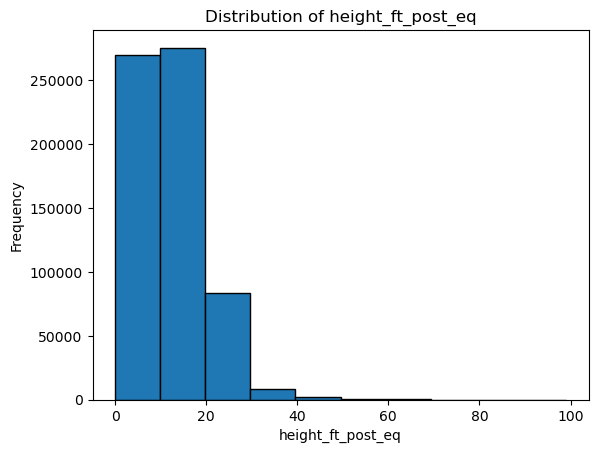

In [567]:
for col in numeric_cols:
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xticks()
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()

In [568]:
floor_anomaly = df[df['count_floors_post_eq'] > df['count_floors_pre_eq']]
print(f'Number of anomalies in number of floors: {len(floor_anomaly)}')
print(f'Percentage of anomalies:{ len(floor_anomaly) / len(df) * 100:.2f}%')

Number of anomalies in number of floors: 804
Percentage of anomalies:0.13%


In [569]:
height_anomaly = df[df['height_ft_post_eq'] > df['height_ft_pre_eq']]
print(f'Number of anomalies in height: {len(height_anomaly)}')
print(f'Percentage of anomalies: {len(height_anomaly) / len(df) * 100:.2f}%')

Number of anomalies in height: 1918
Percentage of anomalies: 0.30%


In [570]:
height_anomaly.loc[:,'height_difference'] = height_anomaly['height_ft_post_eq'] - height_anomaly['height_ft_pre_eq']

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\2297719211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_anomaly.loc[:,'height_difference'] = height_anomaly['height_ft_post_eq'] - height_anomaly['height_ft_pre_eq']


In [571]:
height_anomaly['height_difference'].describe()

count    1918.000000
mean        5.767987
std         7.670298
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        80.000000
Name: height_difference, dtype: float64

In [572]:
floor_anomaly_mask = df['count_floors_post_eq'] > df['count_floors_pre_eq']
height_anomaly_mask = df['height_ft_post_eq'] > df['height_ft_pre_eq']

overlap = sum(floor_anomaly_mask & height_anomaly_mask)
print(f'Number of anomalies in both height and floor count: {overlap}')

Number of anomalies in both height and floor count: 318


Fix Systematic data entry error

In [573]:
# Fix Floor count anomaly
df.loc[floor_anomaly_mask,['count_floors_pre_eq', 'count_floors_post_eq']] = df.loc[floor_anomaly_mask, ['count_floors_post_eq', 'count_floors_pre_eq']].values

# Fix Height anomaly
df.loc[height_anomaly_mask,['anomaly_height_ft_pre_eq', 'height_ft_post_eq']] = df.loc[height_anomaly_mask, ['height_ft_post_eq', 'height_ft_pre_eq']].values

In [574]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,anomaly_height_ft_pre_eq
count,6.399840e+05,639984.000000,639984.000000,639984.000000,639984.000000,639984.000000,639984.000000,639984.000000,639984.000000,639984.000000,1918.000000
mean,2.587460e+11,25.562870,2562.287751,256234.123527,2.290990,1.346590,25.711941,408.544176,17.266341,10.395499,20.528676
std,5.724622e+10,5.728106,573.261432,57326.137638,0.503119,1.112154,66.740858,218.233075,4.987924,8.974049,9.267370
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,9.000000
25%,2.217080e+11,22.000000,2203.000000,220307.000000,2.000000,0.000000,10.000000,286.000000,14.000000,0.000000,16.000000
50%,2.448040e+11,24.000000,2408.000000,240807.000000,2.000000,2.000000,18.000000,360.000000,16.000000,12.000000,18.000000
75%,3.025080e+11,30.000000,3007.000000,300705.000000,3.000000,2.000000,28.000000,470.000000,20.000000,17.000000,22.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,99.000000


Text(0.5, 1.0, 'Correlation Heatmap')

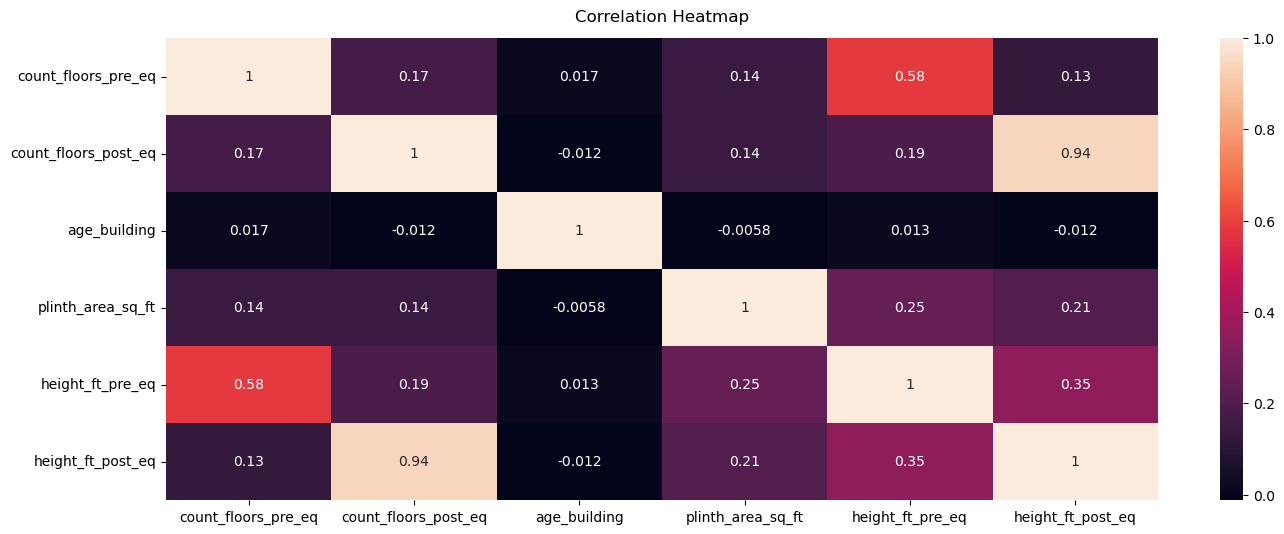

In [575]:
plt.figure(figsize=(16, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

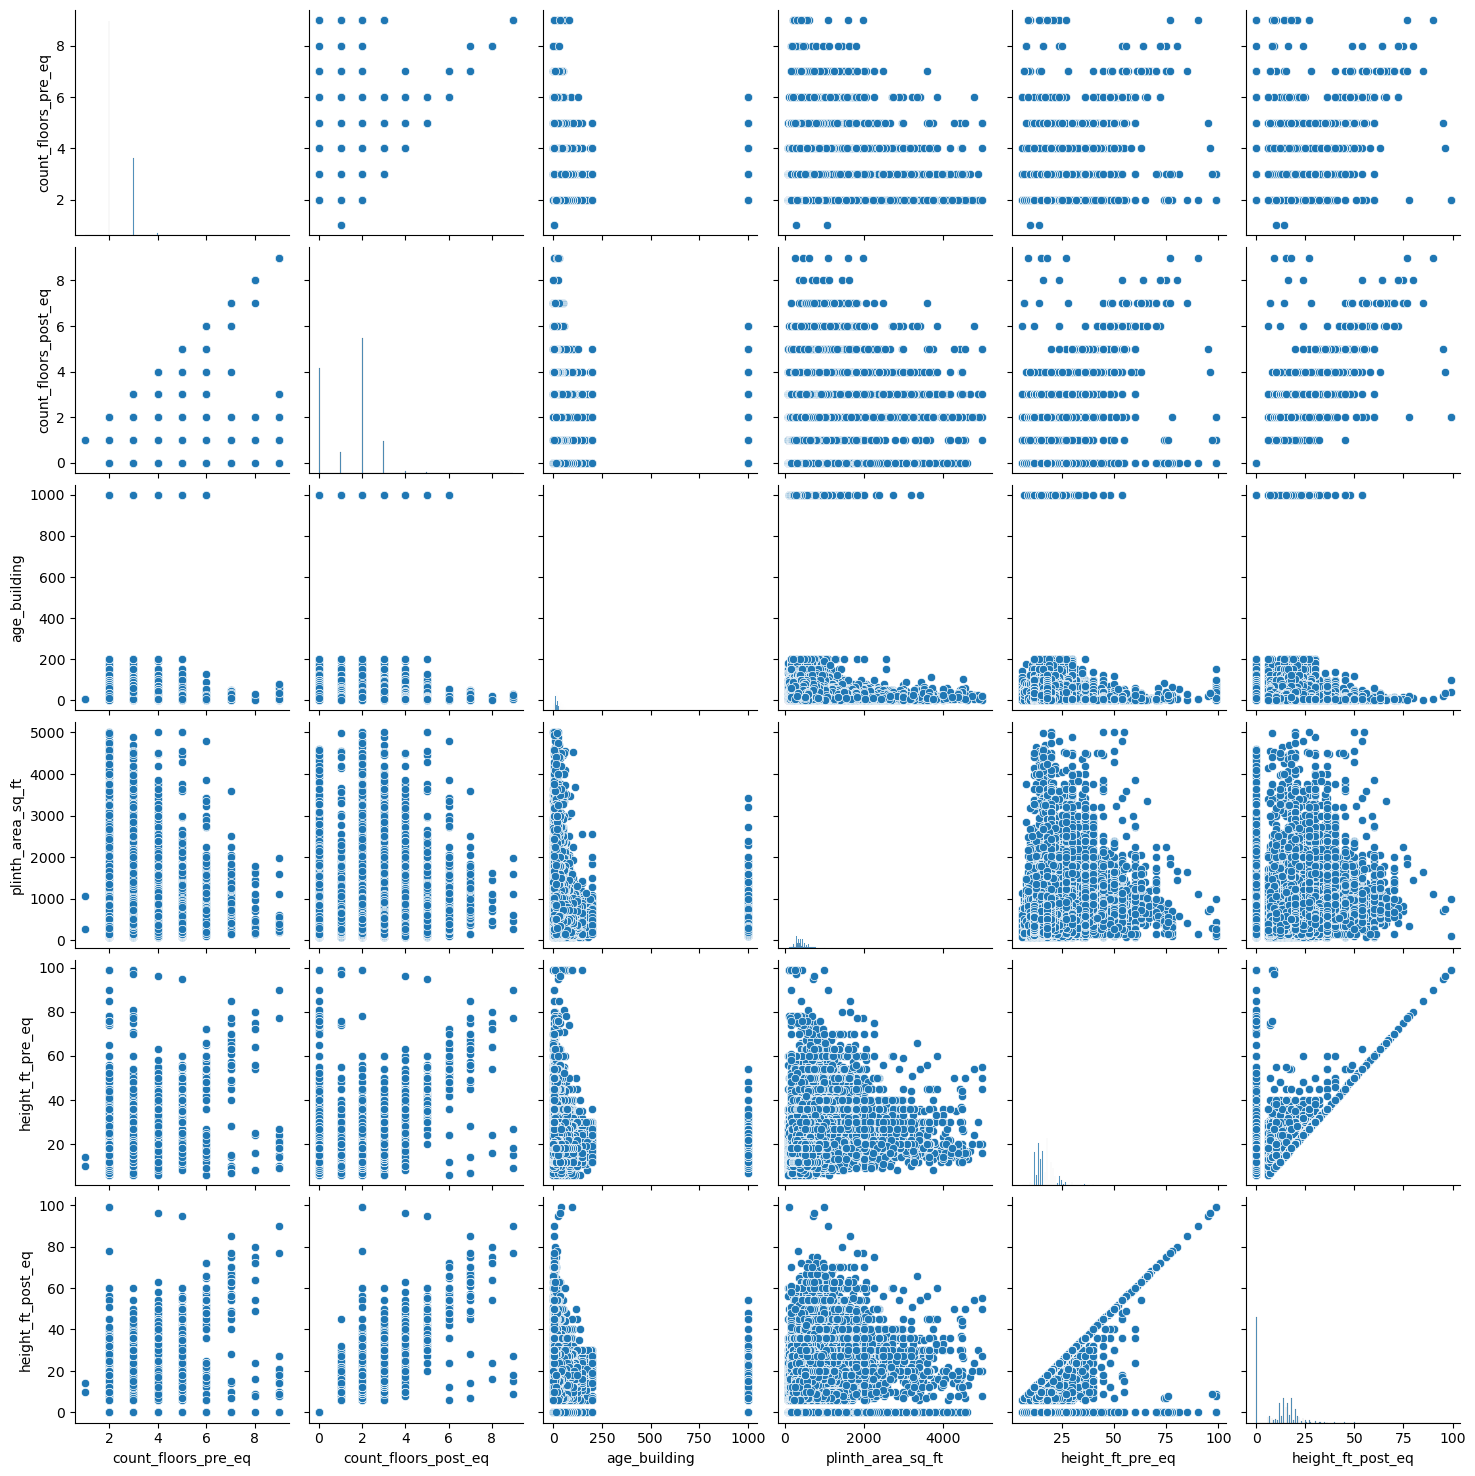

In [576]:
sns.pairplot(df[numeric_cols])

Text(0.5, 1.0, 'Boxplot of Count of Floors Before Earthquake by Foundation Type')

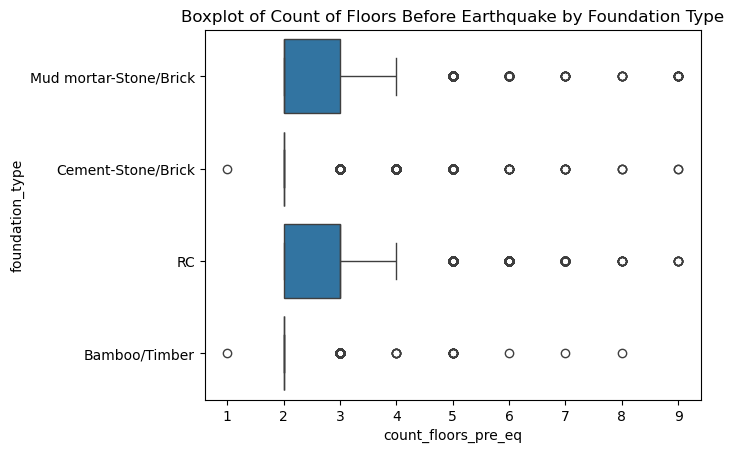

In [577]:
sns.boxplot(x='count_floors_pre_eq',y='foundation_type',data=df)
plt.title('Boxplot of Count of Floors Before Earthquake by Foundation Type')

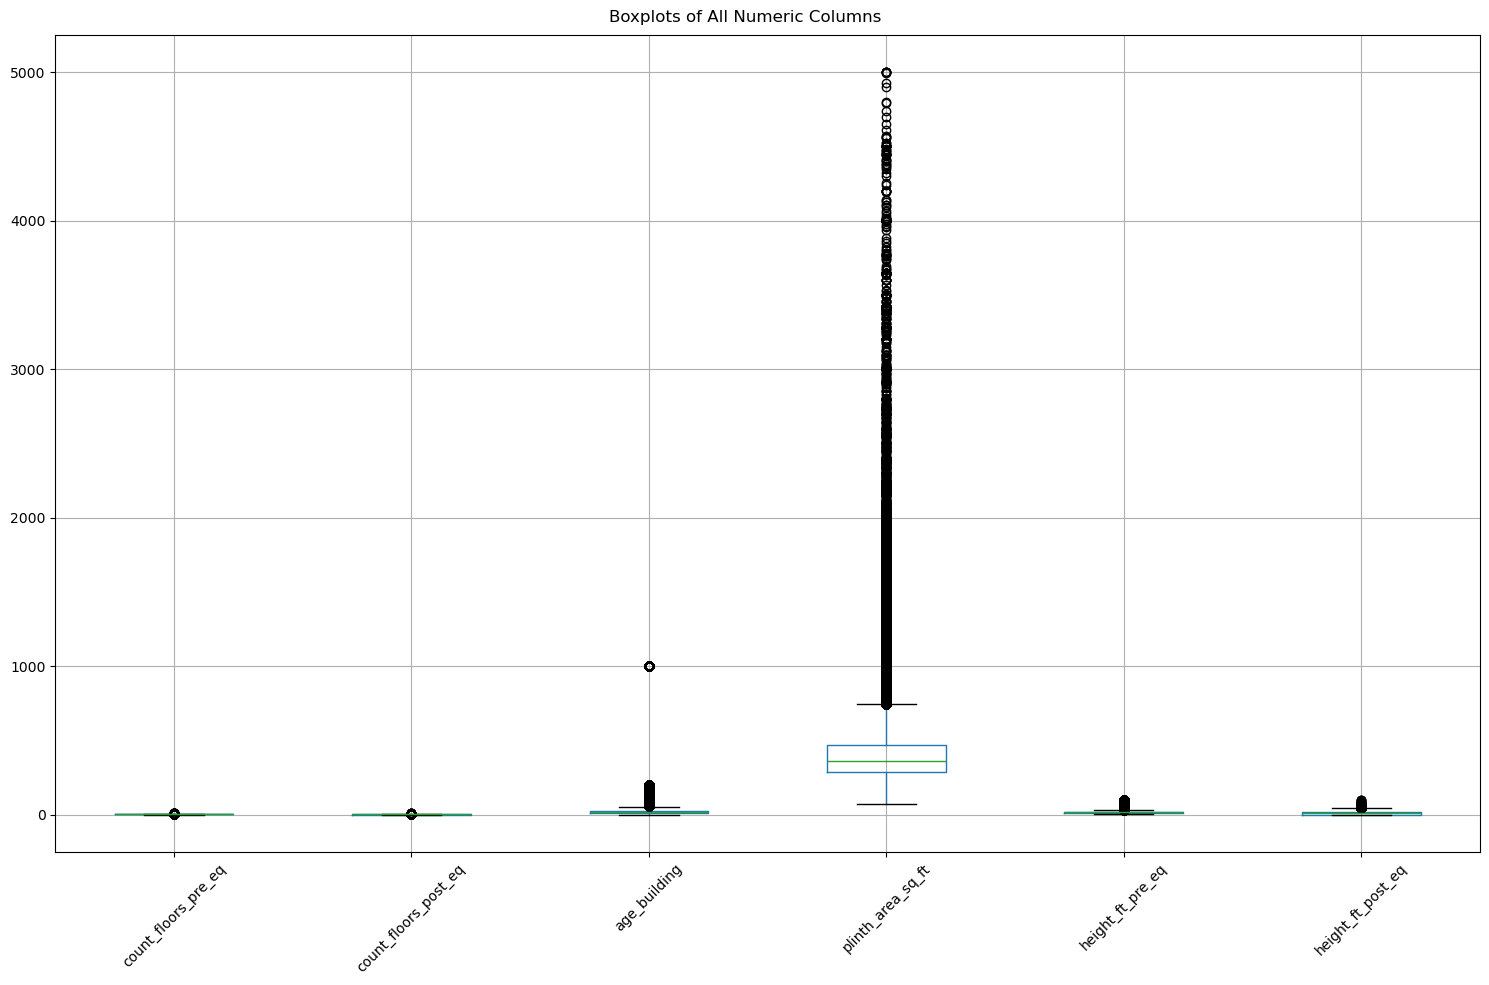

In [578]:
df[numeric_cols].boxplot(figsize=(15, 10))
plt.suptitle('Boxplots of All Numeric Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Handling Outliers

In [579]:
df['height_ft_pre_eq'].describe()

count    639984.000000
mean         17.266341
std           4.987924
min           6.000000
25%          14.000000
50%          16.000000
75%          20.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

In [580]:
def removeoutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    sns.histplot(df[col], bins=10, edgecolor='black')
    plt.title(f'Distribution of {col} with Outliers Removed')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Only keep rows where col is within bounds (and not null)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]


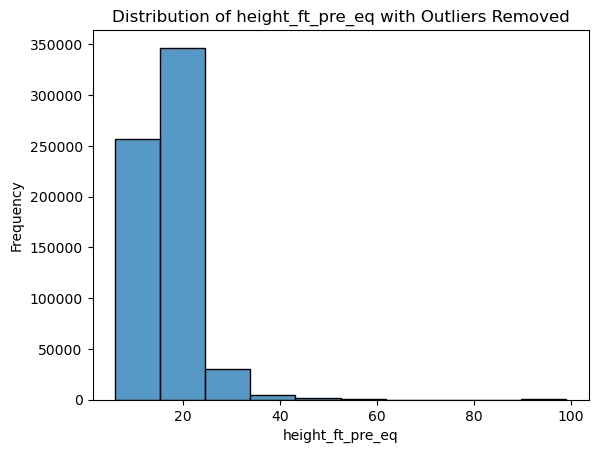

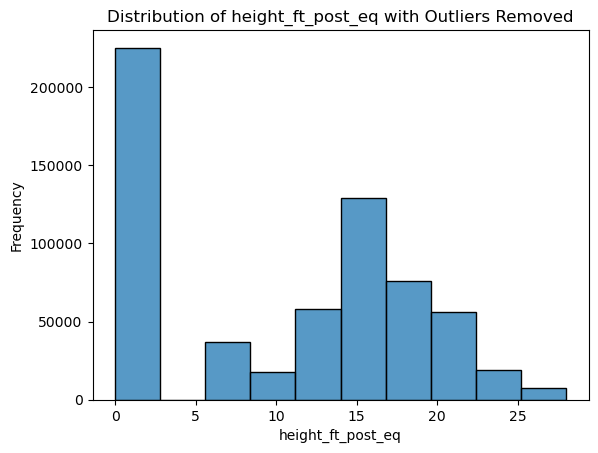

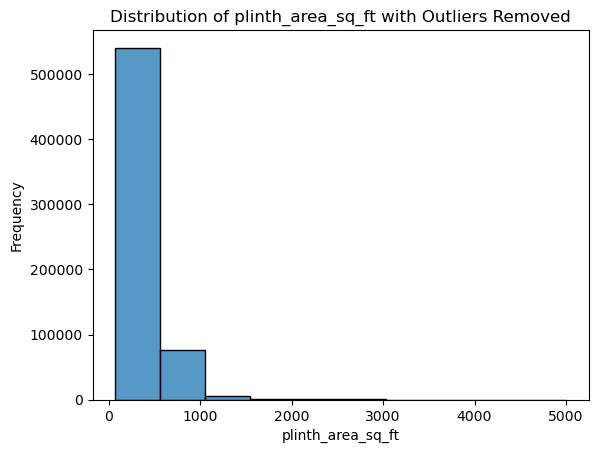

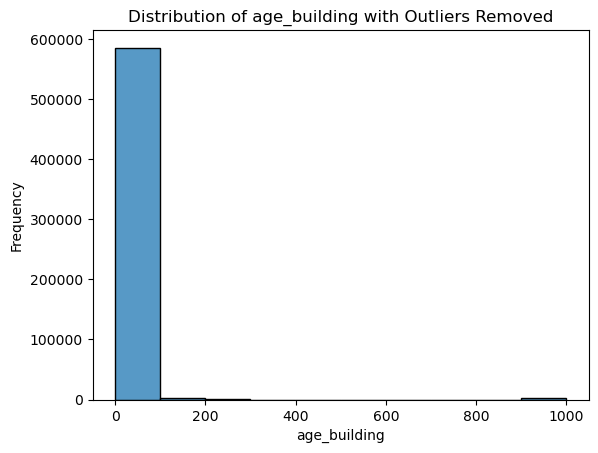

In [581]:
for i in ['height_ft_pre_eq', 'height_ft_post_eq', 'plinth_area_sq_ft', 'age_building']:
    df = removeoutliers(df, i)

Dealing with buildings with age = 999

### Categorical Variables

In [582]:
def categorical_value_counts(df, column):
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    plt.title(f'Value Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


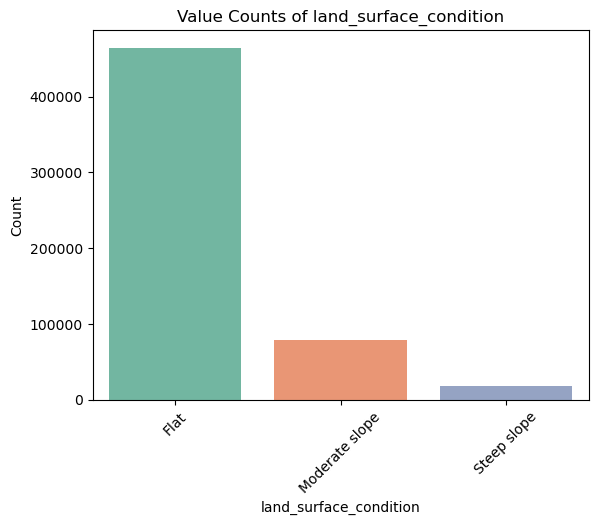

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


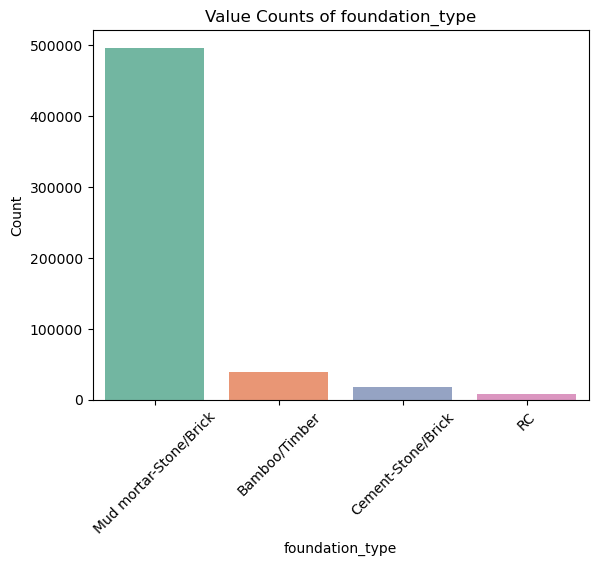

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


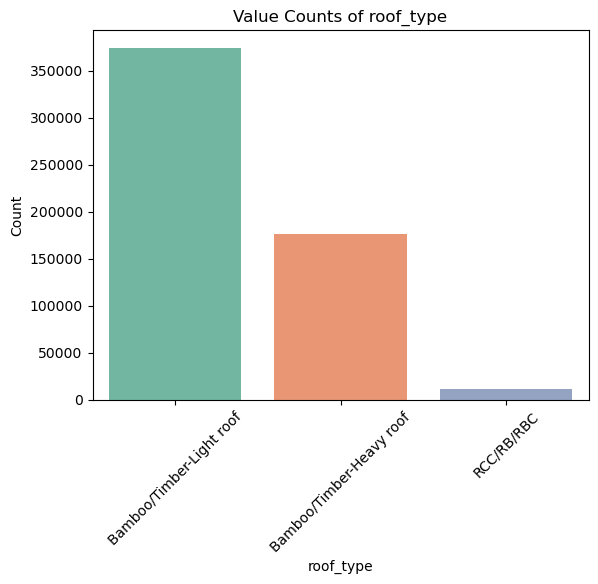

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


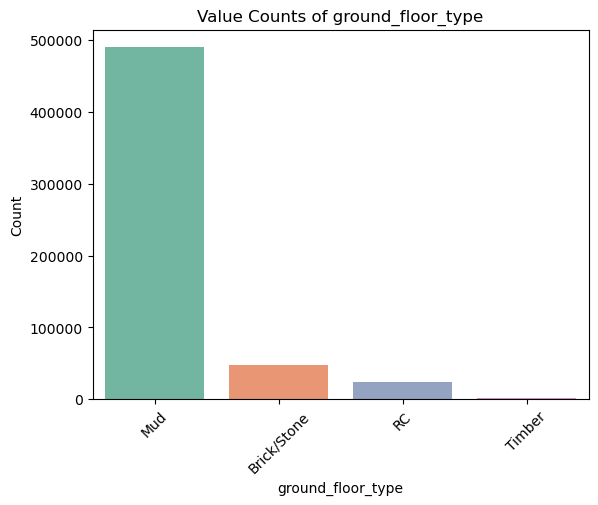

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


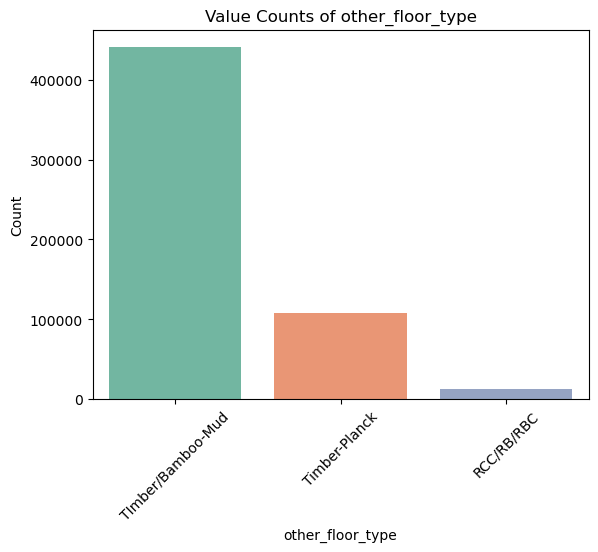

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


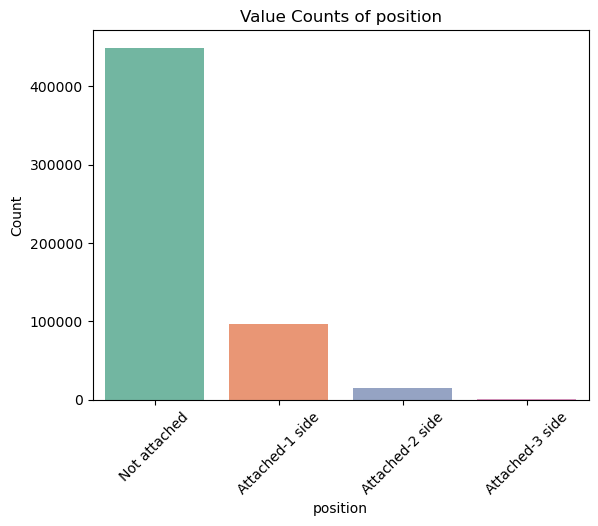

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


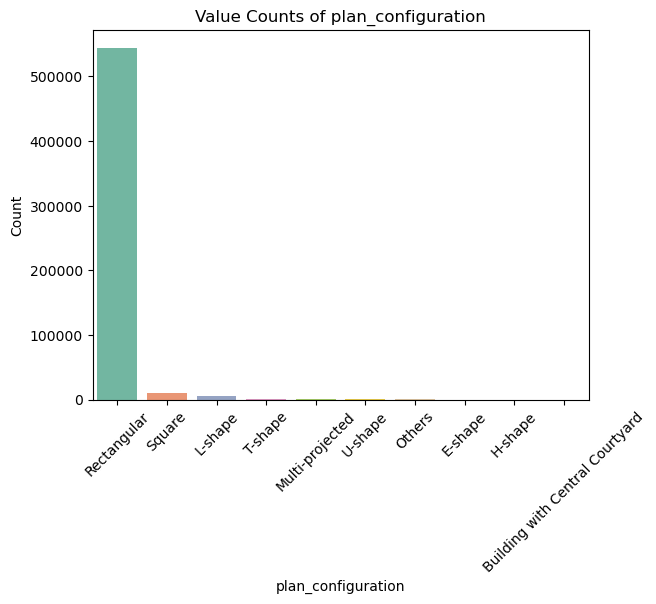

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


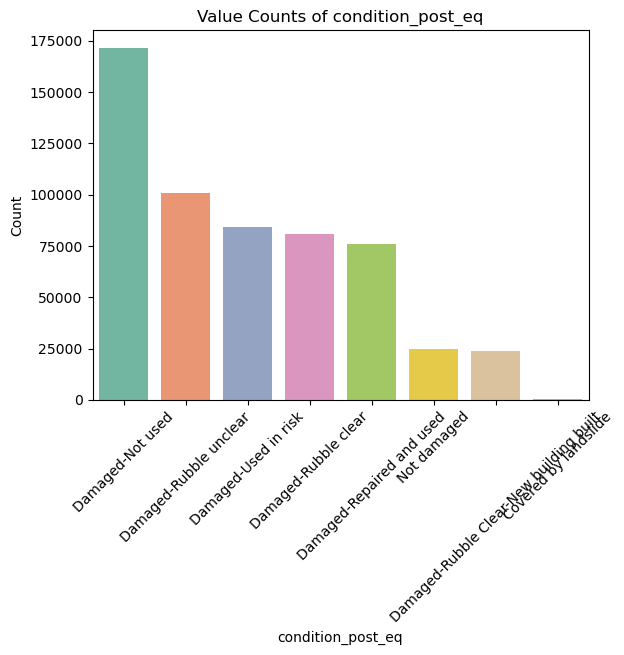

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


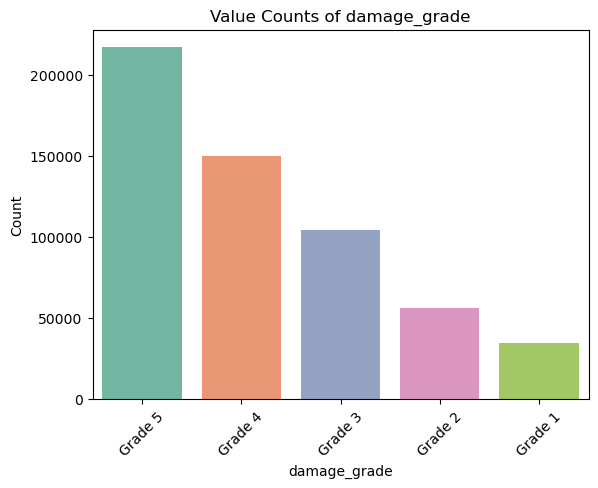

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


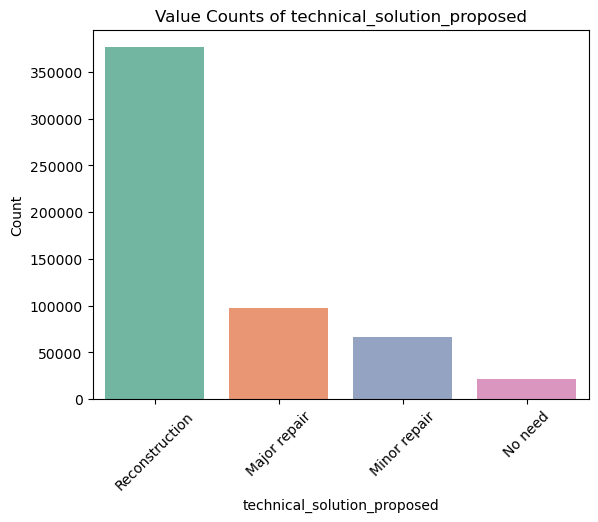

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_11484\919637694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


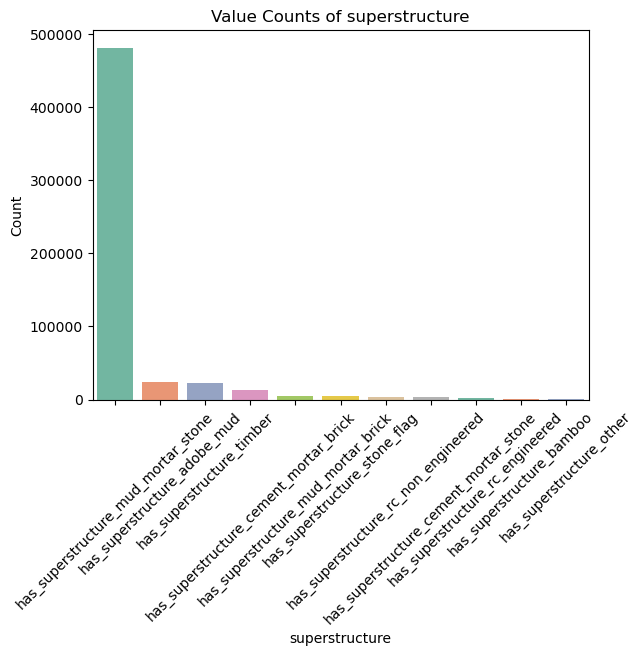

In [583]:
for cat in cat_list:
    categorical_value_counts(df, cat)

## Initial Correlation Check

### Numeric Variables

In [584]:
def numeric_damage_correlation(df, damage, numeric):
    '''Takes a Dataframe and a numeric column and returns the correlation of the numeric column with the damage grade.'''
    sns.boxplot(x=numeric,y=damage,data=df)
    plt.title(f'Boxplot of {numeric} by {damage}')
    plt.show()
    # Print summary statistics
    print(f"\nMean for {numeric}:")
    print(df.groupby(damage)[numeric].mean()) 

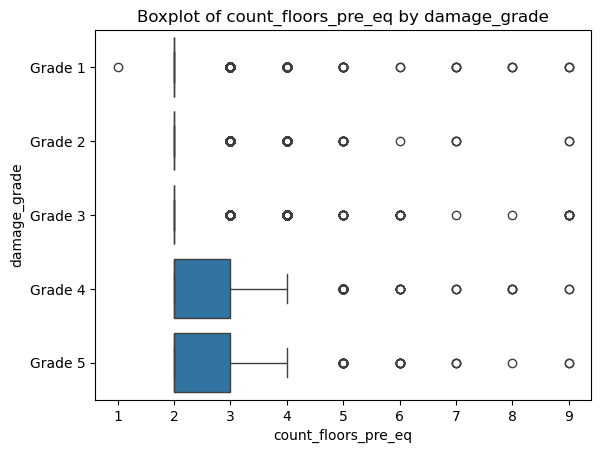


Mean for count_floors_pre_eq:
damage_grade
Grade 1    2.107875
Grade 2    2.144057
Grade 3    2.194520
Grade 4    2.271410
Grade 5    2.325738
Name: count_floors_pre_eq, dtype: float64


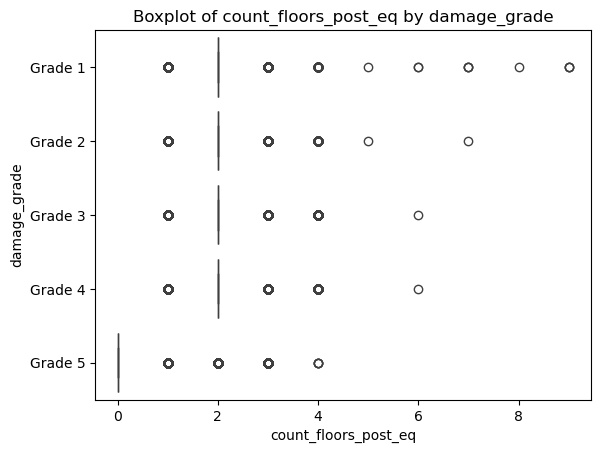


Mean for count_floors_post_eq:
damage_grade
Grade 1    2.089742
Grade 2    2.100078
Grade 3    2.122405
Grade 4    1.974264
Grade 5    0.087598
Name: count_floors_post_eq, dtype: float64


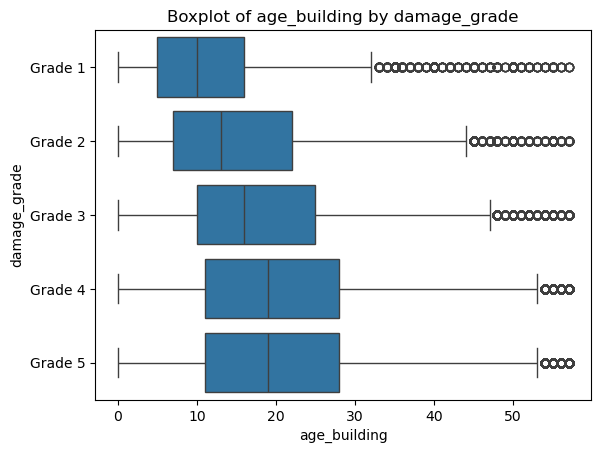


Mean for age_building:
damage_grade
Grade 1    11.752619
Grade 2    15.777542
Grade 3    18.851846
Grade 4    20.637110
Grade 5    20.400572
Name: age_building, dtype: float64


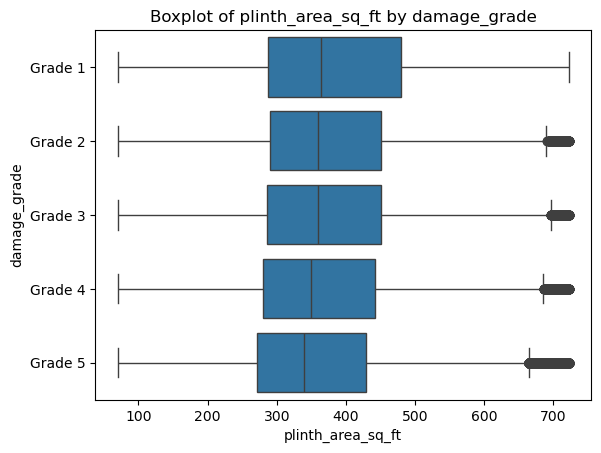


Mean for plinth_area_sq_ft:
damage_grade
Grade 1    386.251698
Grade 2    378.433008
Grade 3    373.607995
Grade 4    366.253355
Grade 5    358.793504
Name: plinth_area_sq_ft, dtype: float64


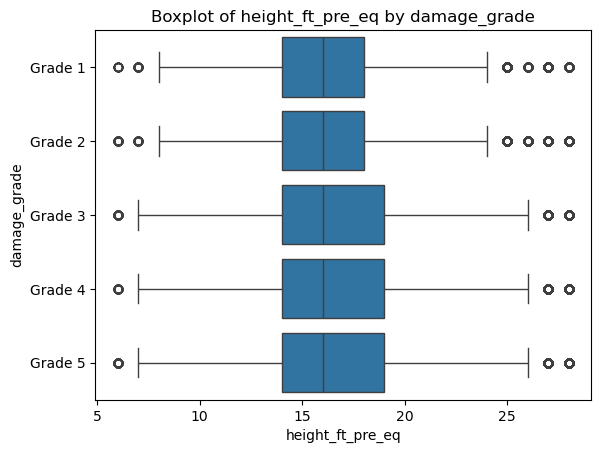


Mean for height_ft_pre_eq:
damage_grade
Grade 1    16.377993
Grade 2    16.441992
Grade 3    16.625628
Grade 4    16.717467
Grade 5    16.810662
Name: height_ft_pre_eq, dtype: float64


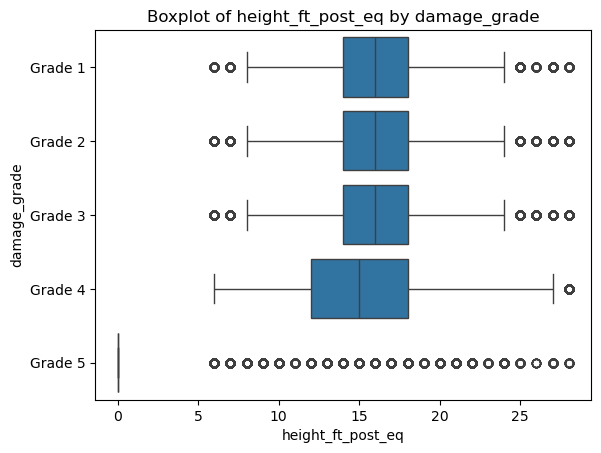


Mean for height_ft_post_eq:
damage_grade
Grade 1    16.296771
Grade 2    16.164147
Grade 3    16.146504
Grade 4    14.649674
Grade 5     0.656975
Name: height_ft_post_eq, dtype: float64


In [585]:
for num in numeric_cols:
    numeric_damage_correlation(df, 'damage_grade', num)

### Categorical Variables

In [586]:
def analyze_categorical_vs_damage(df, categorical_col):
    """
    Create comprehensive analysis of categorical feature vs damage grade
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Count plot
    sns.countplot(x=categorical_col, hue='damage_grade', data=df, ax=axes[0], palette='Set2')
    axes[0].set_title(f'Count by {categorical_col.replace("_", " ").title()}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Stacked bar (counts)
    crosstab_counts = pd.crosstab(df[categorical_col], df['damage_grade'])
    crosstab_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
    axes[1].set_title(f'Stacked Counts by {categorical_col.replace("_", " ").title()}')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Normalized stacked bar (proportions)
    crosstab_pct = pd.crosstab(df[categorical_col], df['damage_grade'], normalize='index')
    crosstab_pct.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
    axes[2].set_title(f'Proportions by {categorical_col.replace("_", " ").title()}')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary for {categorical_col}:")
    print(crosstab_counts.round(3))


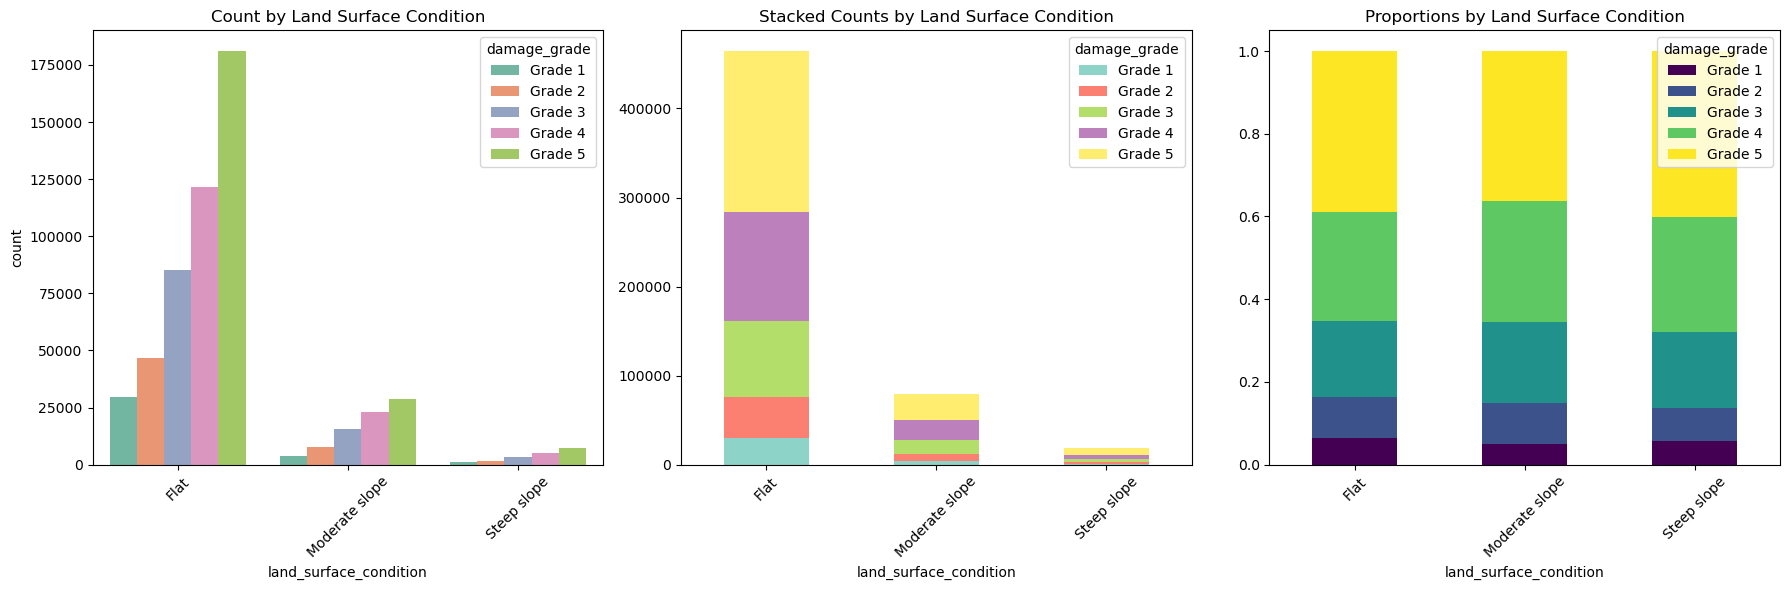


Summary for land_surface_condition:
damage_grade            Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
land_surface_condition                                             
Flat                      29765    46785    85255   121610   181104
Moderate slope             3944     7823    15602    23141    28691
Steep slope                1035     1488     3379     5118     7367


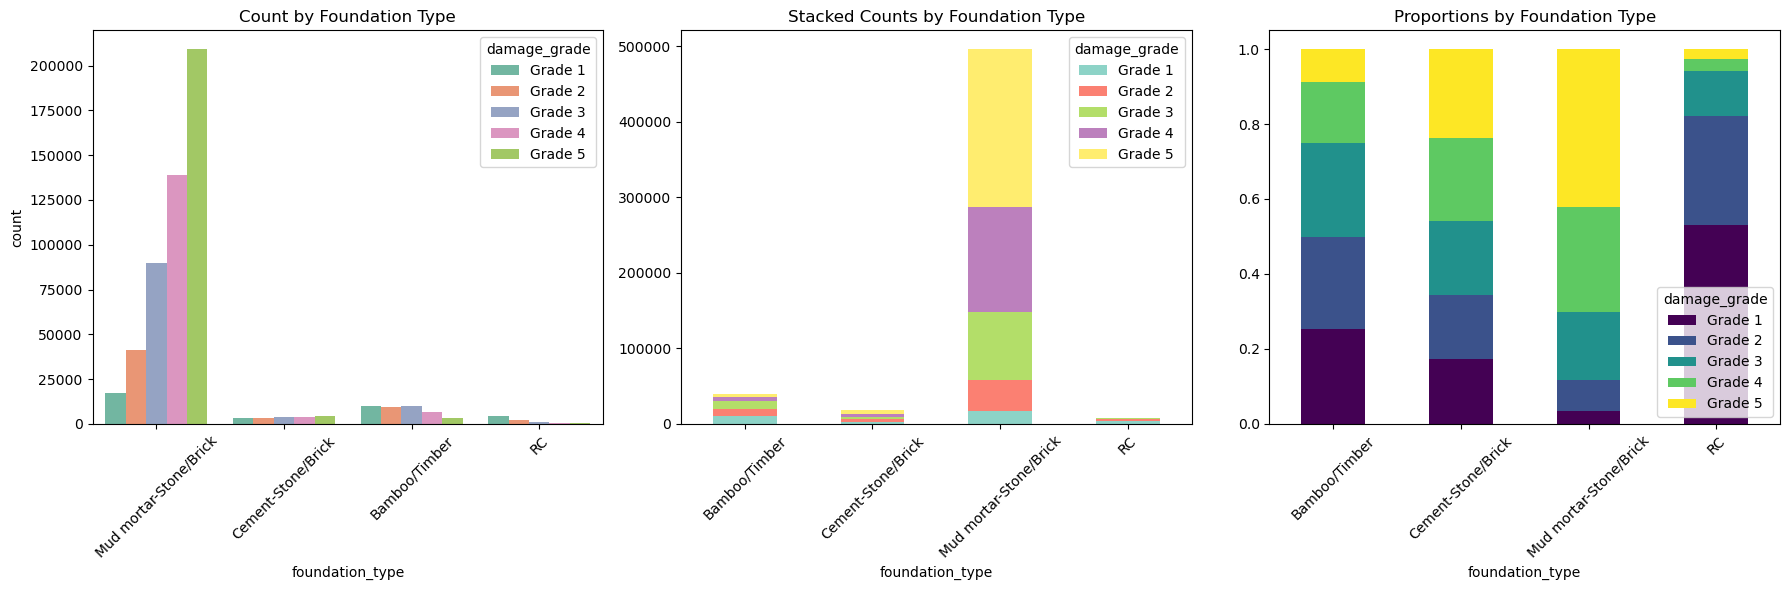


Summary for foundation_type:
damage_grade            Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
foundation_type                                                    
Bamboo/Timber             10061     9646     9995     6475     3455
Cement-Stone/Brick         3089     3043     3557     3955     4250
Mud mortar-Stone/Brick    17215    41008    89687   139173   209247
RC                         4379     2399      997      266      210


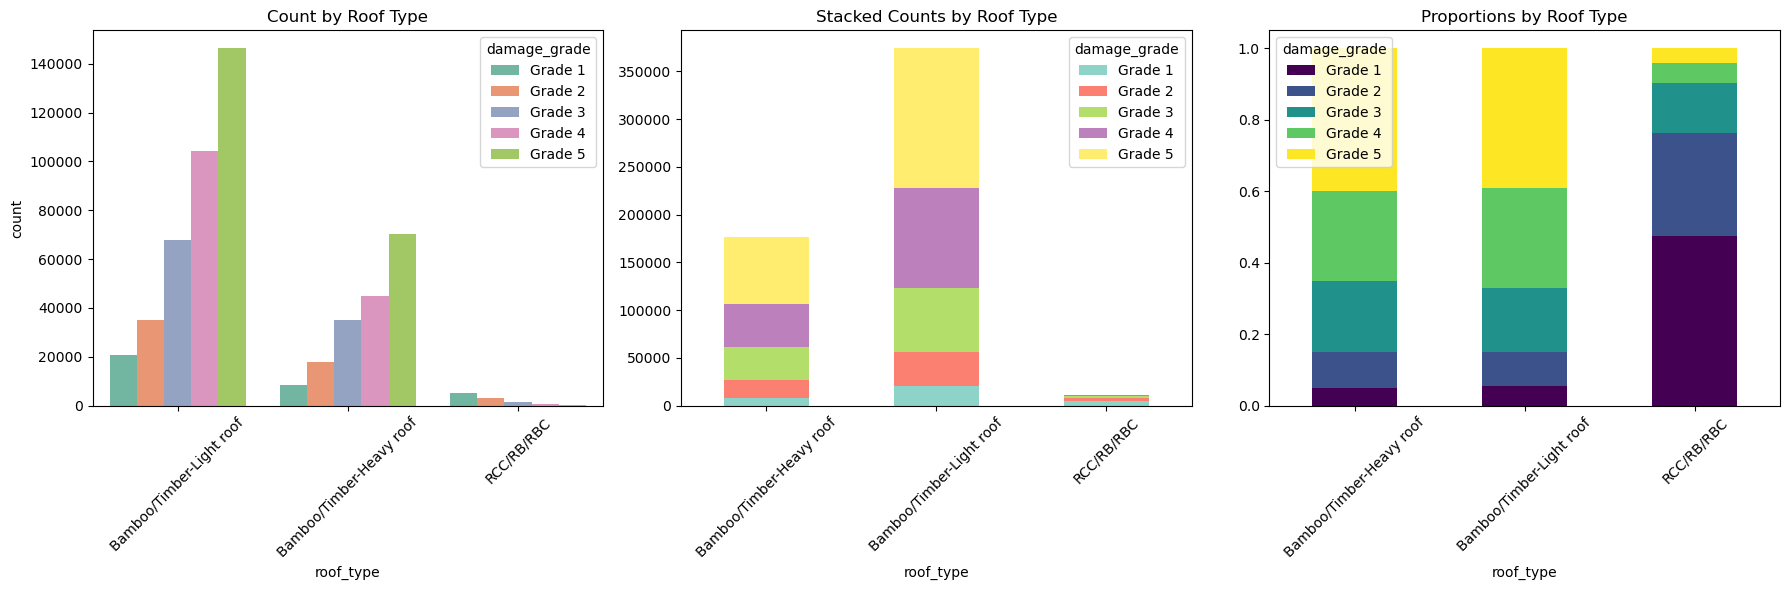


Summary for roof_type:
damage_grade              Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
roof_type                                                            
Bamboo/Timber-Heavy roof     8581    17892    34923    44909    70374
Bamboo/Timber-Light roof    20846    34999    67745   104310   146340
RCC/RB/RBC                   5317     3205     1568      650      448


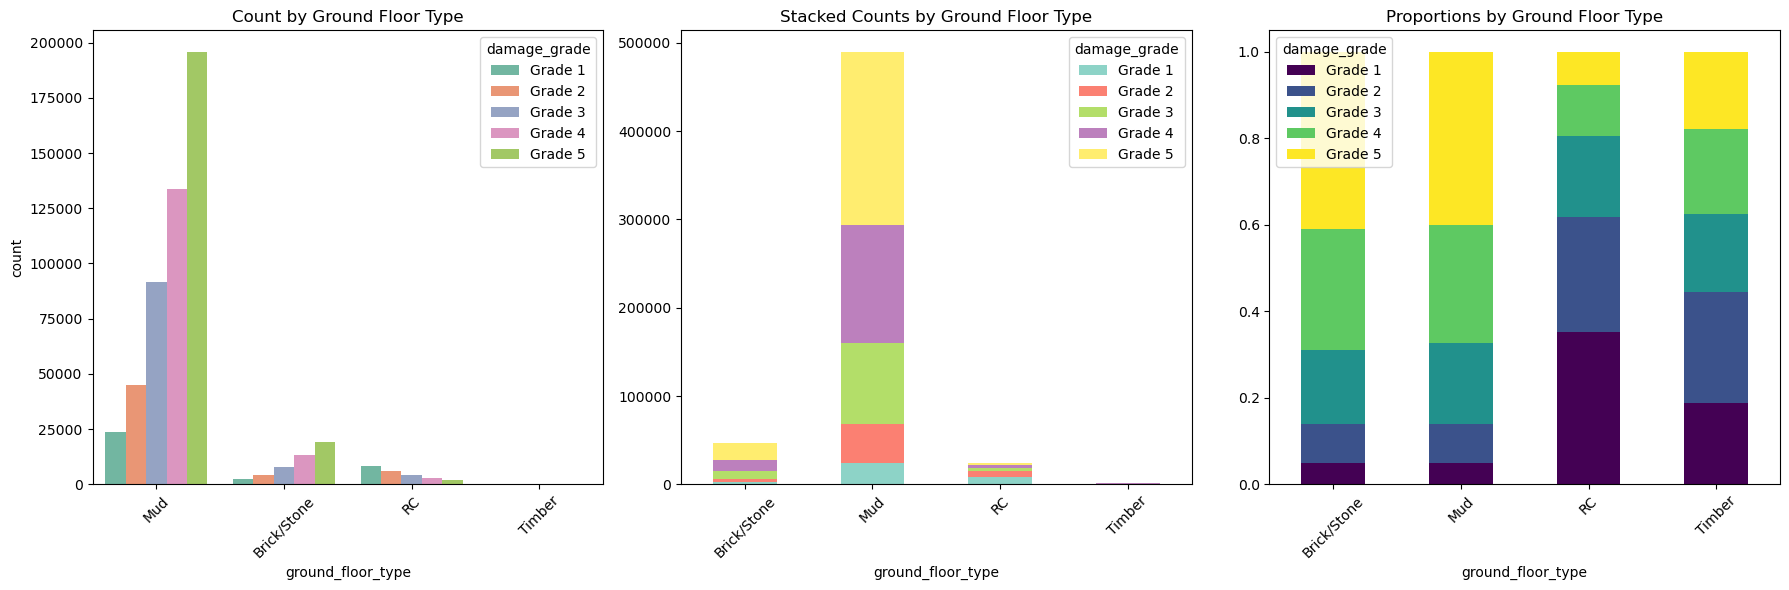


Summary for ground_floor_type:
damage_grade       Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
ground_floor_type                                             
Brick/Stone           2288     4326     8034    13208    19353
Mud                  23794    45104    91466   133545   195752
RC                    8372     6269     4458     2812     1784
Timber                 290      397      278      304      273


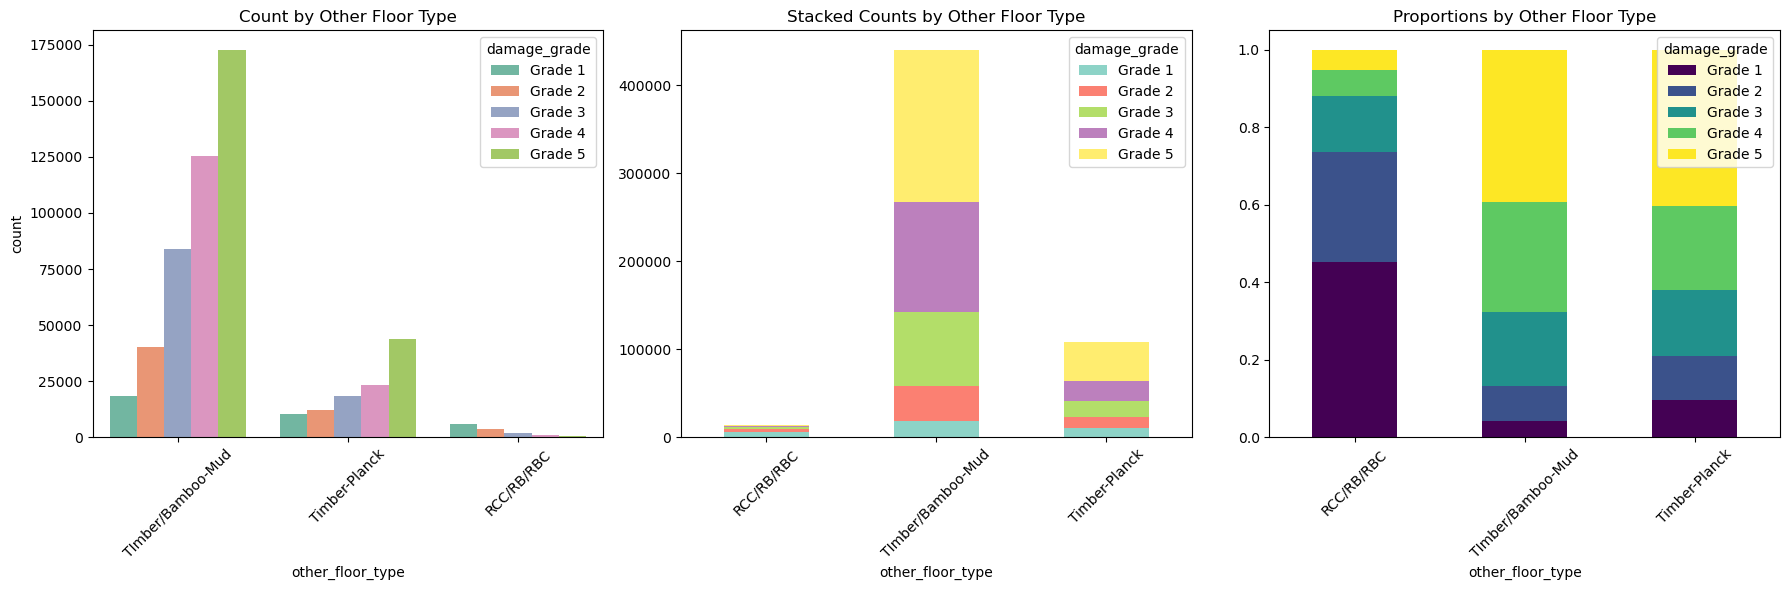


Summary for other_floor_type:
damage_grade       Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
other_floor_type                                              
RCC/RB/RBC            6047     3826     1929      897      705
TImber/Bamboo-Mud    18254    40094    83910   125566   172771
Timber-Planck        10443    12176    18397    23406    43686


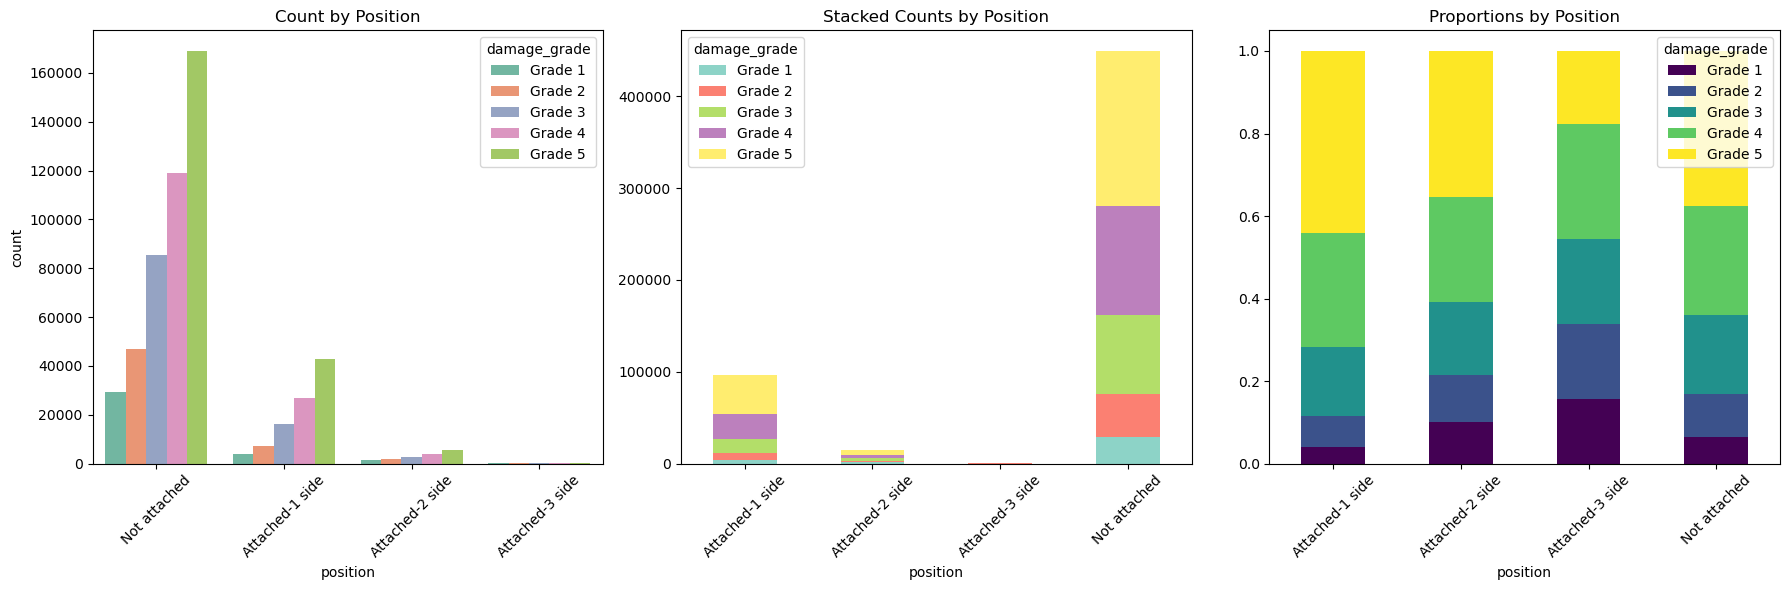


Summary for position:
damage_grade     Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
position                                                    
Attached-1 side     3839     7334    16087    26823    42648
Attached-2 side     1552     1762     2689     3895     5445
Attached-3 side       99      115      130      175      112
Not attached       29254    46885    85330   118976   168957


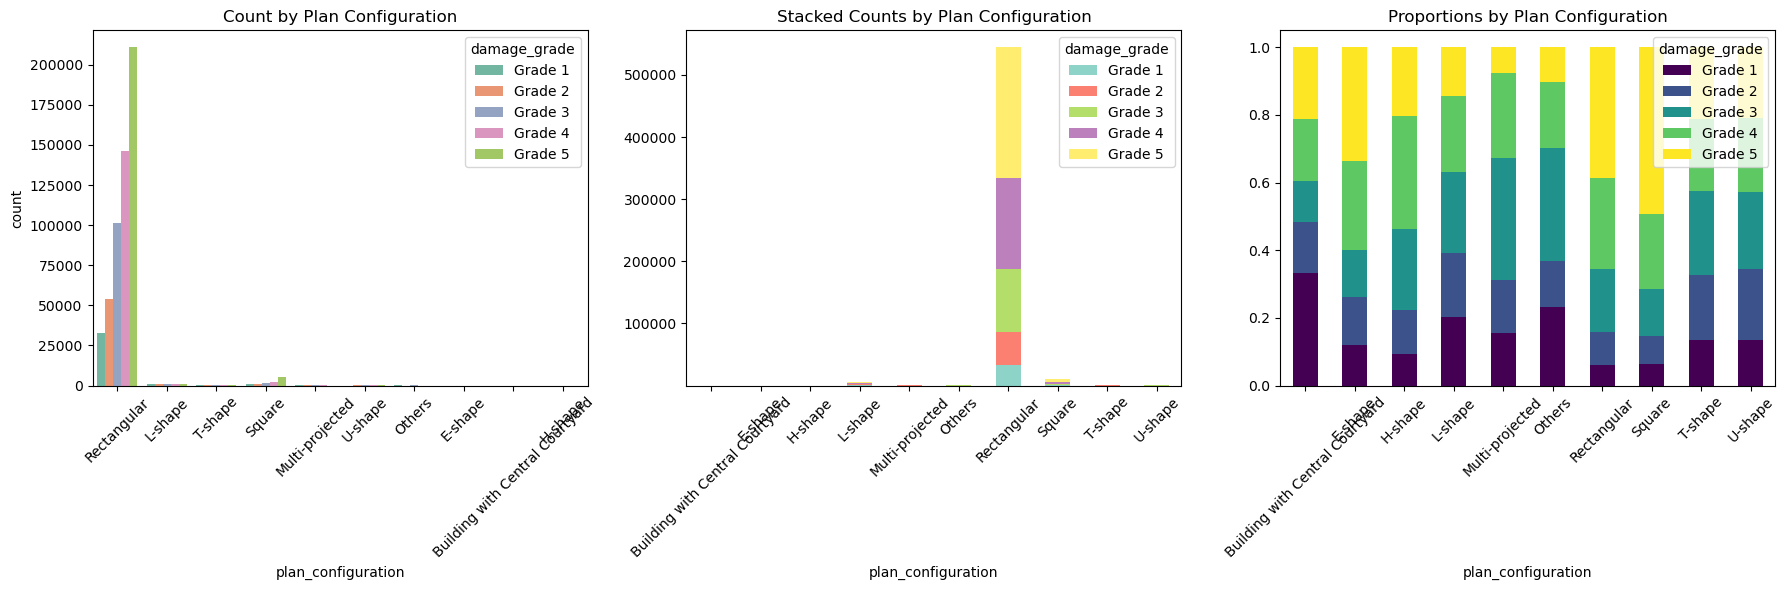


Summary for plan_configuration:
damage_grade                     Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
plan_configuration                                                          
Building with Central Courtyard       11        5        4        6        7
E-shape                               11       13       13       24       31
H-shape                                5        7       13       18       11
L-shape                             1034      982     1227     1148      735
Multi-projected                       69       71      161      112       34
Others                                43       25       62       36       19
Rectangular                        32778    53953   101061   146002   210877
Square                               683      881     1496     2348     5276
T-shape                               84      119      155      133      132
U-shape                               26       40       44       42       40


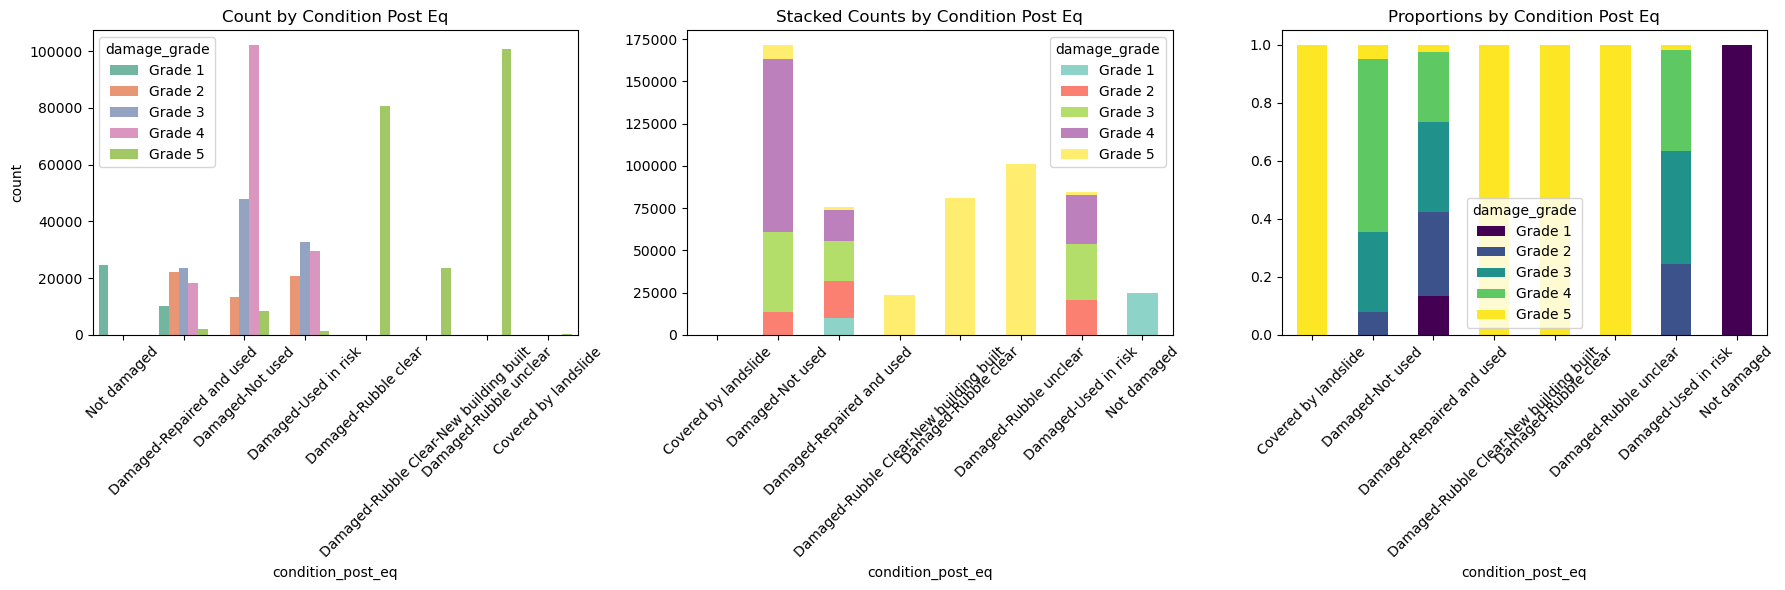


Summary for condition_post_eq:
damage_grade                             Grade 1  Grade 2  Grade 3  Grade 4  \
condition_post_eq                                                             
Covered by landslide                           0        0        0        0   
Damaged-Not used                               0    13233    47871   102242   
Damaged-Repaired and used                  10072    22054    23610    18185   
Damaged-Rubble Clear-New building built        0        0        0        0   
Damaged-Rubble clear                           0        0        0        0   
Damaged-Rubble unclear                         0        0        0        0   
Damaged-Used in risk                           0    20765    32755    29442   
Not damaged                                24672       44        0        0   

damage_grade                             Grade 5  
condition_post_eq                                 
Covered by landslide                         169  
Damaged-Not used        

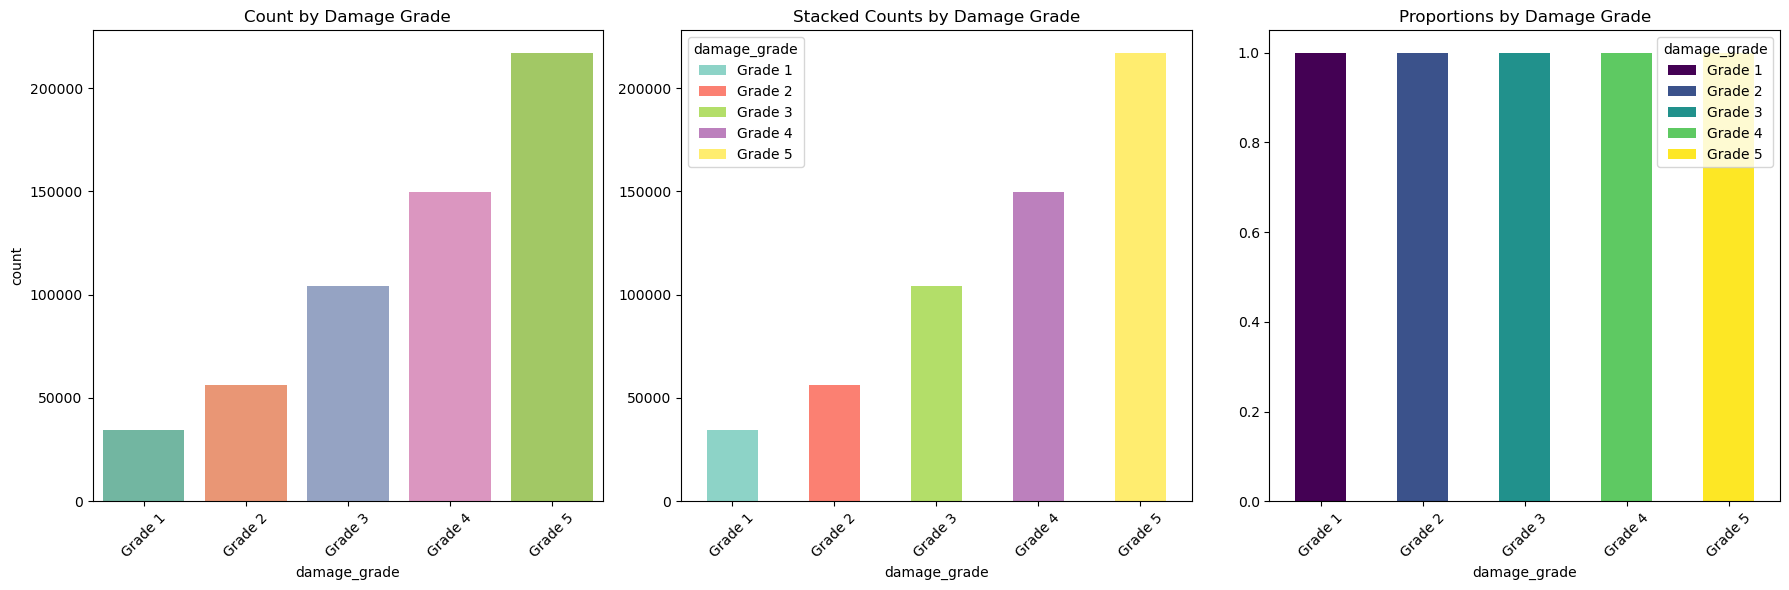


Summary for damage_grade:
damage_grade  Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
damage_grade                                             
Grade 1         34744        0        0        0        0
Grade 2             0    56096        0        0        0
Grade 3             0        0   104236        0        0
Grade 4             0        0        0   149869        0
Grade 5             0        0        0        0   217162


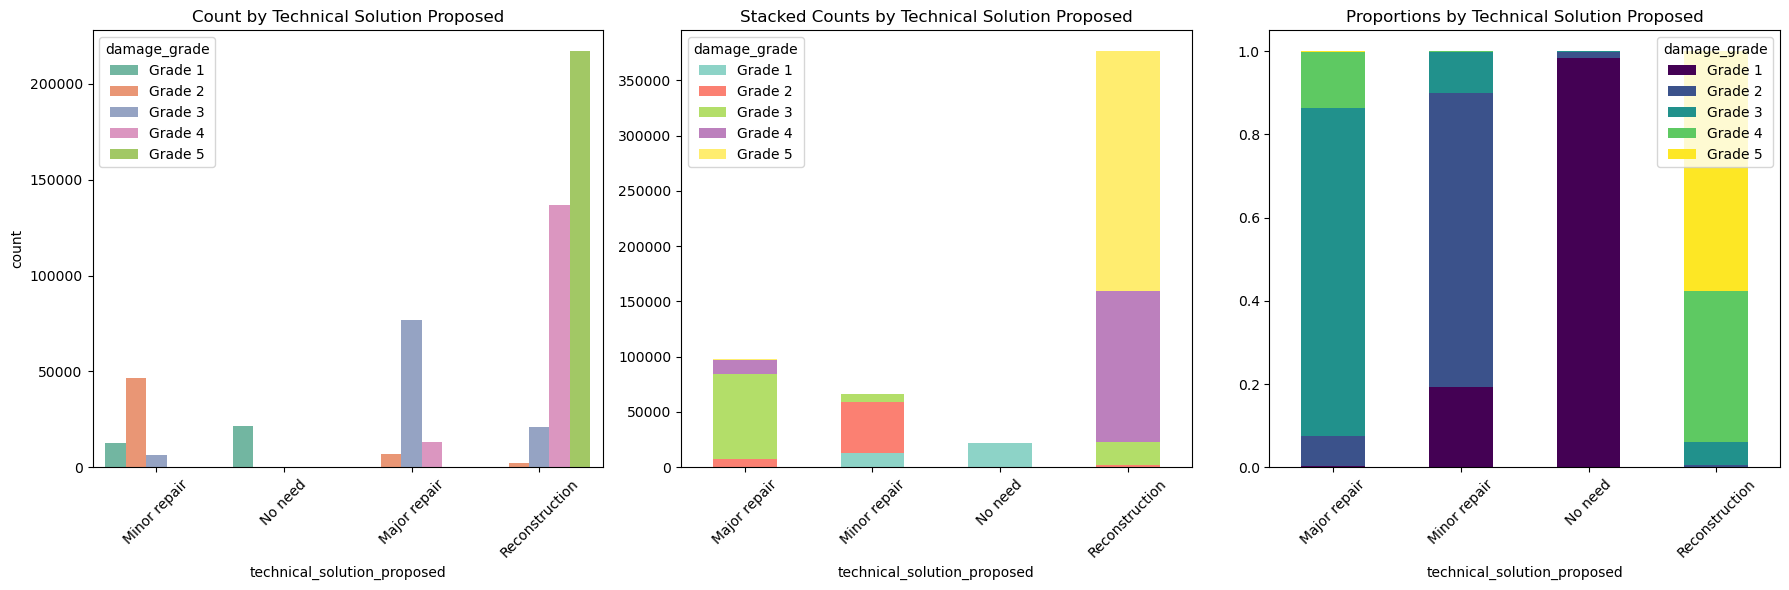


Summary for technical_solution_proposed:
damage_grade                 Grade 1  Grade 2  Grade 3  Grade 4  Grade 5
technical_solution_proposed                                             
Major repair                     203     7107    76945    13153      107
Minor repair                   12726    46728     6475      128       18
No need                        21667      314       35        9        8
Reconstruction                   148     1947    20781   136579   217029


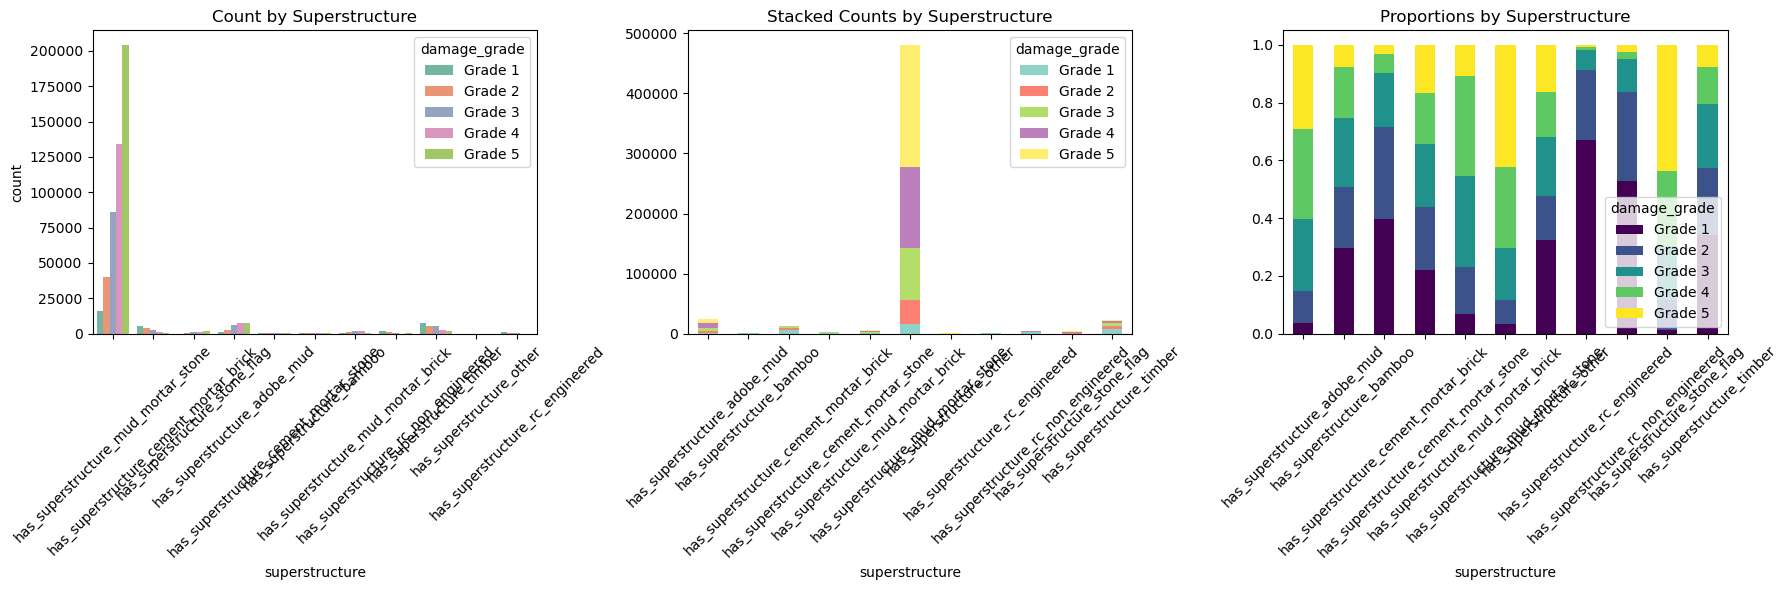


Summary for superstructure:
damage_grade                            Grade 1  Grade 2  Grade 3  Grade 4  \
superstructure                                                               
has_superstructure_adobe_mud                916     2684     6145     7640   
has_superstructure_bamboo                   415      292      334      248   
has_superstructure_cement_mortar_brick     5318     4289     2519      874   
has_superstructure_cement_mortar_stone      748      728      745      598   
has_superstructure_mud_mortar_brick         371      892     1704     1888   
has_superstructure_mud_mortar_stone       16100    39918    86262   134426   
has_superstructure_other                     77       36       48       37   
has_superstructure_rc_engineered           1077      387      114       16   
has_superstructure_rc_non_engineered       1942     1121      422       86   
has_superstructure_stone_flag                63      468      874     1201   
has_superstructure_timber          

In [587]:
for cat in cat_list:
    analyze_categorical_vs_damage(df,cat)

In [588]:
irrelevant_features = ['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'superstructure', 'technical_solution_proposed','plan_configuration']
relevant_features = df.columns[~df.columns.isin(irrelevant_features)]

In [589]:
relevant_features

Index(['count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'condition_post_eq', 'damage_grade', 'anomaly_height_ft_pre_eq'],
      dtype='object')

In [590]:
df_clean = df.copy()
df_clean = df_clean[relevant_features]

In [591]:
df_clean.drop('anomaly_height_ft_pre_eq', axis=1, inplace=True)


In [592]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,condition_post_eq,damage_grade
0,2,2,15,528,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Not damaged,Grade 1
1,2,2,18,528,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Damaged-Repaired and used,Grade 1
2,2,2,22,336,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Damaged-Repaired and used,Grade 2
3,2,2,2,435,19,19,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Damaged-Repaired and used,Grade 1
4,2,2,7,330,19,19,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Damaged-Repaired and used,Grade 1


In [594]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562107 entries, 0 to 562106
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   count_floors_pre_eq     562107 non-null  int64 
 1   count_floors_post_eq    562107 non-null  int64 
 2   age_building            562107 non-null  int64 
 3   plinth_area_sq_ft       562107 non-null  int64 
 4   height_ft_pre_eq        562107 non-null  int64 
 5   height_ft_post_eq       562107 non-null  int64 
 6   land_surface_condition  562107 non-null  object
 7   foundation_type         562107 non-null  object
 8   roof_type               562107 non-null  object
 9   ground_floor_type       562107 non-null  object
 10  other_floor_type        562107 non-null  object
 11  position                562107 non-null  object
 12  condition_post_eq       562107 non-null  object
 13  damage_grade            562107 non-null  object
dtypes: int64(6), object(8)
memory usage: